## Análisis de accidentes - Buses

### Area metropolitana del Valle de Aburrá

Manuela Cordoba

Alejandro Fernandez

Ana María Jaramillo

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import config

In [2]:
loaded_cleaned_data = pd.read_excel(config.CLEANED_TRASNLATED_DATA)
loaded_cleaned_data

,case_number,period,geoco_type,severity,neighborhood,month,day,longitude,latitude,area_code,...,vehicle_class,service_type,brand,model,zone,design,driver_age,gender,weekday,hour
0,1739400,2021,road_network,injured,prado,2,25,-75.563376,6.263505,high_mix_use_areas_and_corridors,...,bus,public,modasa,2011,comuna_3,roundabout,45,male,thursday,14
1,1735512,2021,road_network,material_damage_only,el_progreso,1,14,-75.578933,6.271674,medium_mix_use_areas_and_corridors,...,automobile,private,mazda,2011,comuna_7,road_segment,30,male,thursday,18
2,1735512,2021,road_network,material_damage_only,el_progreso,1,14,-75.578933,6.271674,medium_mix_use_areas_and_corridors,...,bus,public,agrale,2008,comuna_7,road_segment,58,male,thursday,18
3,1735374,2021,road_network,material_damage_only,caribe,1,13,-75.575081,6.266311,high_mix_use_areas_and_corridors,...,automobile,private,renault,2017,comuna_7,road_segment,55,male,wednesday,19
4,1735374,2021,road_network,material_damage_only,caribe,1,13,-75.575081,6.266311,high_mix_use_areas_and_corridors,...,bus,public,chevrolet,2015,comuna_7,road_segment,30,male,wednesday,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79107,1470979,2014,approximate_road_network,material_damage_only,la_candelaria,12,31,-75.568715,6.247466,high_mix_use_areas_and_corridors,...,bus,public,daihatsu,2006,comuna_10,road_segment,49,male,wednesday,16
79108,1470984,2014,inverted_road_network_crossing,material_damage_only,la_candelaria,12,31,-75.564683,6.249282,high_mix_use_areas_and_corridors,...,automobile,public,hyundai,2014,comuna_10,road_segment,22,male,wednesday,13
79109,1470984,2014,inverted_road_network_crossing,material_damage_only,la_candelaria,12,31,-75.564683,6.249282,high_mix_use_areas_and_corridors,...,bus,public,modasa,2013,comuna_10,road_segment,41,male,wednesday,13
79110,1470985,2014,approximate_road_network,material_damage_only,los_mangos,12,31,-75.541845,6.249259,low_mix_use_areas,...,automobile,private,chevrolet,2009,comuna_8,cycle_route,41,male,wednesday,15


In [3]:
anselin_data = pd.read_excel(config.MORAN_ANSELIN_DATA)
anselin_data

,OBJECTID,Join_Count,TARGET_FID,case_numbe,longitude,latitude,severity,Weight_Sev,FREQUENCY,COUNT_case_numbe,...,NNeighbors_Anselin_Count,ZTransform_Anselin_Count,SpatialLag_Anselin_Count,LMiIndex_Anselin_Sev,LMiZScore_Anselin_Sev,LMiPValue_Anselin_Sev,COType_Anselin_Sev,NNeighbors_Anselin_Sev,ZTransform_Anselin_Sev,SpatialLag_Anselin_Sev
0,1,1,1,1423926,-75.576508,6.291228,injured,1,1,1,...,58.0,-0.018730,0.543881,0.582253,2.156081,0.014,LL,44.0,-1.827121,-0.319771
1,2,1,2,1423928,-75.575037,6.250175,injured,1,1,1,...,64.0,-0.171911,-0.078987,0.448096,3.615966,0.002,HH,43.0,0.780164,0.576343
2,3,1,3,1423988,-75.554314,6.263090,material_damage_only,3,1,1,...,76.0,-0.200892,0.080199,0.683349,3.255197,0.004,LL,44.0,-1.332783,-0.514491
3,4,1,4,1424000,-75.577322,6.213905,material_damage_only,3,2,2,...,66.0,11.043453,1.087238,0.770721,2.638864,0.004,HH,25.0,1.294009,0.597661
4,5,1,5,1424009,-75.560258,6.264596,material_damage_only,3,2,2,...,64.0,0.047511,0.825632,-0.023569,-0.710857,0.216,0,46.0,0.201719,-0.117243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41328,41329,1,41329,1739876,-75.582522,6.248546,material_damage_only,3,2,2,...,47.0,-0.229872,-0.135707,0.403800,3.023240,0.008,HH,42.0,0.806987,0.502105
41329,41330,1,41330,1739890,-75.562822,6.247261,injured,1,1,1,...,61.0,-0.163631,0.664080,0.311093,2.712888,0.006,HH,44.0,0.751173,0.415572
41330,41331,1,41331,1739934,-75.573665,6.275430,material_damage_only,3,2,2,...,59.0,0.134451,-0.007766,0.118755,2.632521,0.004,HH,48.0,0.299780,0.397507
41331,41332,1,41332,1739935,-75.558157,6.311913,material_damage_only,3,2,2,...,55.0,0.142732,0.631059,-0.074470,-0.861760,0.184,0,27.0,0.379012,-0.197163


In [4]:
anselin_data.columns

Index(['OBJECTID', 'Join_Count', 'TARGET_FID', 'case_numbe', 'longitude',
       'latitude', 'severity', 'Weight_Sev', 'FREQUENCY', 'COUNT_case_numbe',
       'neighborhood_code', 'neighborhood_name', 'neighborhood_id',
       'GiZScore_Count', 'GiPValue_Count', 'NNeighbors_Count', 'Gi_Bin_Count',
       'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity',
       'Gi_Bin_Severity', 'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count',
       'LMiPValue_Anselin_Count', 'COType_Anselin_Count',
       'NNeighbors_Anselin_Count', 'ZTransform_Anselin_Count',
       'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev',
       'LMiZScore_Anselin_Sev', 'LMiPValue_Anselin_Sev', 'COType_Anselin_Sev',
       'NNeighbors_Anselin_Sev', 'ZTransform_Anselin_Sev',
       'SpatialLag_Anselin_Sev'],
      dtype='object')

In [5]:
# Remover columnas innecesarias 
anselin_data = anselin_data.drop(columns=['OBJECTID', 'Join_Count', 'TARGET_FID','longitude', 
                                          'latitude', 'severity', 'Weight_Sev', 'FREQUENCY', 'COUNT_case_numbe',
                                          'neighborhood_code', 'neighborhood_name', 'neighborhood_id'])
anselin_data

,case_numbe,GiZScore_Count,GiPValue_Count,NNeighbors_Count,Gi_Bin_Count,GiZScore_Severity,GiPValue_Severity,NNeighbors_Severity,Gi_Bin_Severity,LMiIndex_Anselin_Count,...,NNeighbors_Anselin_Count,ZTransform_Anselin_Count,SpatialLag_Anselin_Count,LMiIndex_Anselin_Sev,LMiZScore_Anselin_Sev,LMiPValue_Anselin_Sev,COType_Anselin_Sev,NNeighbors_Anselin_Sev,ZTransform_Anselin_Sev,SpatialLag_Anselin_Sev
0,1423926,-0.044562,9.644564e-01,63.0,0.0,-2.248732,0.024530,45.0,-2.0,-0.010156,...,58.0,-0.018730,0.543881,0.582253,2.156081,0.014,LL,44.0,-1.827121,-0.319771
1,1423928,7.714763,0.000000e+00,61.0,3.0,3.439327,0.000583,44.0,3.0,0.013538,...,64.0,-0.171911,-0.078987,0.448096,3.615966,0.002,HH,43.0,0.780164,0.576343
2,1423988,4.789657,1.670669e-06,60.0,3.0,-3.271693,0.001069,45.0,-3.0,-0.016063,...,76.0,-0.200892,0.080199,0.683349,3.255197,0.004,LL,44.0,-1.332783,-0.514491
3,1424000,0.764648,4.444812e-01,37.0,0.0,3.275918,0.001053,26.0,3.0,11.970702,...,66.0,11.043453,1.087238,0.770721,2.638864,0.004,HH,25.0,1.294009,0.597661
4,1424009,5.551551,2.831457e-08,69.0,3.0,-0.939343,0.347555,47.0,0.0,0.039108,...,64.0,0.047511,0.825632,-0.023569,-0.710857,0.216,0,46.0,0.201719,-0.117243
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41328,1739876,6.942926,3.840616e-12,66.0,3.0,3.196617,0.001390,43.0,3.0,0.031101,...,47.0,-0.229872,-0.135707,0.403800,3.023240,0.008,HH,42.0,0.806987,0.502105
41329,1739890,7.351307,0.000000e+00,67.0,3.0,2.667819,0.007635,45.0,3.0,-0.108337,...,61.0,-0.163631,0.664080,0.311093,2.712888,0.006,HH,44.0,0.751173,0.415572
41330,1739934,3.491899,4.795993e-04,70.0,3.0,1.758349,0.078688,49.0,1.0,-0.001041,...,59.0,0.134451,-0.007766,0.118755,2.632521,0.004,HH,48.0,0.299780,0.397507
41331,1739935,-0.780243,4.352479e-01,41.0,0.0,-1.594513,0.110821,28.0,0.0,0.089801,...,55.0,0.142732,0.631059,-0.074470,-0.861760,0.184,0,27.0,0.379012,-0.197163


In [6]:
joined_data = loaded_cleaned_data.merge(
    anselin_data, left_on="case_number", right_on="case_numbe"
)
print("Shape of joined_data: ", joined_data.shape)
joined_data.tail()

Shape of joined_data:  (79112, 50)


,case_number,period,geoco_type,severity,neighborhood,month,day,longitude,latitude,area_code,...,NNeighbors_Anselin_Count,ZTransform_Anselin_Count,SpatialLag_Anselin_Count,LMiIndex_Anselin_Sev,LMiZScore_Anselin_Sev,LMiPValue_Anselin_Sev,COType_Anselin_Sev,NNeighbors_Anselin_Sev,ZTransform_Anselin_Sev,SpatialLag_Anselin_Sev
79107,1470979,2014,approximate_road_network,material_damage_only,la_candelaria,12,31,-75.568715,6.247466,high_mix_use_areas_and_corridors,...,61.0,-0.163631,0.664080,0.311093,2.712888,0.006,HH,44.0,0.751173,0.415572
79108,1470984,2014,inverted_road_network_crossing,material_damage_only,la_candelaria,12,31,-75.564683,6.249282,high_mix_use_areas_and_corridors,...,61.0,-0.163631,0.664080,0.311093,2.712888,0.006,HH,44.0,0.751173,0.415572
79109,1470984,2014,inverted_road_network_crossing,material_damage_only,la_candelaria,12,31,-75.564683,6.249282,high_mix_use_areas_and_corridors,...,61.0,-0.163631,0.664080,0.311093,2.712888,0.006,HH,44.0,0.751173,0.415572
79110,1470985,2014,approximate_road_network,material_damage_only,los_mangos,12,31,-75.541845,6.249259,low_mix_use_areas,...,66.0,-0.014590,0.111999,0.018643,2.667649,0.006,LL,35.0,-0.040150,-0.465942
79111,1470985,2014,approximate_road_network,material_damage_only,los_mangos,12,31,-75.541845,6.249259,low_mix_use_areas,...,66.0,-0.014590,0.111999,0.018643,2.667649,0.006,LL,35.0,-0.040150,-0.465942


In [7]:
joined_data.columns

Index(['case_number', 'period', 'geoco_type', 'severity', 'neighborhood',
       'month', 'day', 'longitude', 'latitude', 'area_code',
       'user_category_code', 'subcategory_code', 'subcategory', 'hierarchy',
       'road_class', 'stratum', 'accident_type', 'vehicle_class',
       'service_type', 'brand', 'model', 'zone', 'design', 'driver_age',
       'gender', 'weekday', 'hour', 'case_numbe', 'GiZScore_Count',
       'GiPValue_Count', 'NNeighbors_Count', 'Gi_Bin_Count',
       'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity',
       'Gi_Bin_Severity', 'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count',
       'LMiPValue_Anselin_Count', 'COType_Anselin_Count',
       'NNeighbors_Anselin_Count', 'ZTransform_Anselin_Count',
       'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev',
       'LMiZScore_Anselin_Sev', 'LMiPValue_Anselin_Sev', 'COType_Anselin_Sev',
       'NNeighbors_Anselin_Sev', 'ZTransform_Anselin_Sev',
       'SpatialLag_Anselin_Sev'],
      dtype='obje

### Notas importantes: 
mes: se esta tomando numérico
día: se está tomando numérico

## Borrar "features" con correlación = 1

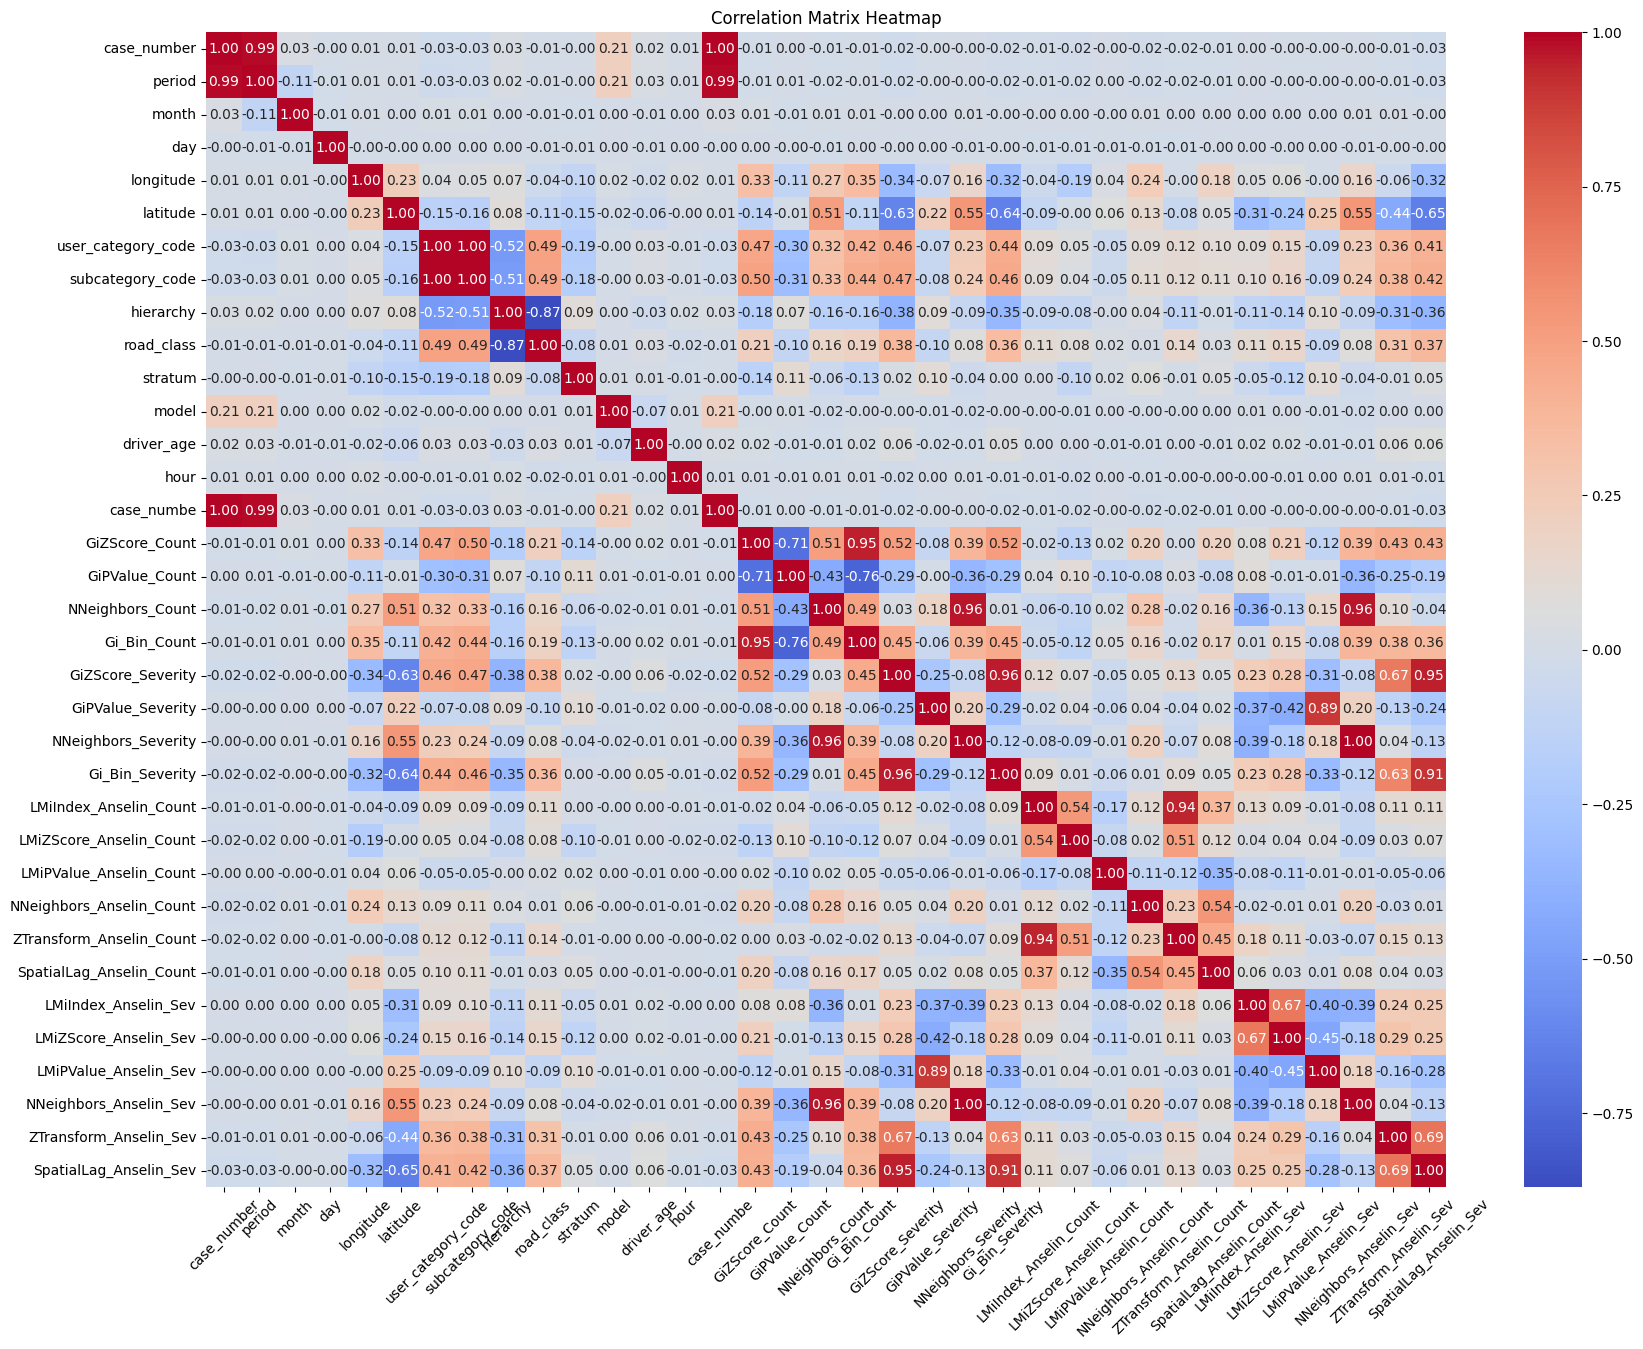

In [ ]:
# Select only numeric columns from joined_data
numeric_data = joined_data.select_dtypes(include=[float, int])

# Create a correlation matrix using only numeric data
correlation_matrix = numeric_data.corr()


# Set up the Matplotlib figure
plt.figure(figsize=(20, 15))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

In [9]:
columns_to_remove = ['case_number', 'period', 'geoco_type', 'severity', 'neighborhood',
                     'month', 'day', 'longitude', 'latitude', 'area_code',
                     'user_category_code', 'subcategory_code', 'subcategory', 'hierarchy',
                     'road_class', 'stratum', 'accident_type', 'vehicle_class',
       'service_type', 'brand', 'model', 'zone', 'design', 'driver_age',
       'gender', 'weekday', 'hour', 'case_numbe', 'GiZScore_Count',
       'GiPValue_Count', 'NNeighbors_Count', 'Gi_Bin_Count',
       'GiZScore_Severity', 'GiPValue_Severity', 'NNeighbors_Severity',
       'Gi_Bin_Severity', 'LMiIndex_Anselin_Count', 'LMiZScore_Anselin_Count',
       'LMiPValue_Anselin_Count', 'COType_Anselin_Count',
       'NNeighbors_Anselin_Count', 'ZTransform_Anselin_Count',
       'SpatialLag_Anselin_Count', 'LMiIndex_Anselin_Sev',
       'LMiZScore_Anselin_Sev', 'LMiPValue_Anselin_Sev', 'COType_Anselin_Sev',
       'NNeighbors_Anselin_Sev', 'ZTransform_Anselin_Sev',
       'SpatialLag_Anselin_Sev']#, 'LMiPValue',]

# Remove specified columns
df = df.drop(columns=columns_to_remove)


# Create a correlation matrix
correlation_matrix = df.corr()

# Set up the Matplotlib figure
plt.figure(figsize=(20, 15))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

NameError: name 'df' is not defined

### QUÉ HACER CON LAS VARIABLES LMILNDEX Y LMIZSCORE??

## Get dummies

In [ ]:
categorical_columns = ['tipo_geoco', 'diseno', 'areagralus',
                        'subcategor', 'clase_acci', 'clase_vehi', 'tipo_servi', 'marca',
                        'zona', 'sexo', 'dia_semana', 'COType']
df_encoded = pd.get_dummies(df, columns=categorical_columns)

In [ ]:
df_encoded

,periodo,gravedad,mes,dia,cod_subcat,hierarchy,road_class,estrato_pr,modelo,edad_condu,...,dia_semana_Saturday,dia_semana_Sunday,dia_semana_Thursday,dia_semana_Tuesday,dia_semana_Wednesday,COType_,COType_HH,COType_HL,COType_LH,COType_LL
0,2020.0,damage_only,3.0,10.0,32.0,4.0,1.0,0.0,2017.0,56.0,...,0,0,0,1,0,0,0,0,1,0
1,2020.0,damage_only,3.0,10.0,32.0,4.0,1.0,0.0,2013.0,61.0,...,0,0,0,1,0,0,0,0,1,0
2,2021.0,injured,1.0,24.0,43.0,1.0,6.0,0.0,2016.0,33.0,...,0,1,0,0,0,0,0,0,1,0
3,2021.0,injured,1.0,24.0,43.0,1.0,6.0,0.0,2017.0,48.0,...,0,1,0,0,0,0,0,0,1,0
4,2021.0,injured,1.0,24.0,43.0,1.0,6.0,0.0,2016.0,34.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87644,2014.0,damage_only,12.0,29.0,0.0,0.0,0.0,2.0,2011.0,46.0,...,0,0,0,0,0,1,0,0,0,0
87645,2014.0,damage_only,12.0,29.0,0.0,0.0,0.0,2.0,2008.0,60.0,...,0,0,0,0,0,1,0,0,0,0
87646,2014.0,damage_only,12.0,29.0,0.0,0.0,0.0,2.0,2009.0,26.0,...,0,0,0,0,0,1,0,0,0,0
87647,2014.0,damage_only,12.0,30.0,0.0,0.0,0.0,2.0,1989.0,47.0,...,0,0,0,1,0,1,0,0,0,0


In [ ]:
#'''
# Create a correlation matrix
correlation_matrix = df_encoded.corr()

# Set up the Matplotlib figure
plt.figure(figsize=(300, 300))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()
#'''

'\n# Create a correlation matrix\ncorrelation_matrix = df_encoded.corr()\n\n# Set up the Matplotlib figure\nplt.figure(figsize=(300, 300))\n\n# Create a heatmap using Seaborn\nsns.heatmap(correlation_matrix, annot=True, cmap=\'coolwarm\', fmt=".2f")\n\n# Customize the plot (optional)\nplt.title("Correlation Matrix Heatmap")\nplt.xticks(rotation=45)\nplt.show()\n'

In [ ]:
# Filter the correlation matrix to get pairs with correlation greater than 0.8
high_correlation_pairs = (correlation_matrix.abs() > 0.8) & (correlation_matrix.abs() < 1)

# Get the names of variables with high correlation
high_correlation_variables = set()
for i in range(len(high_correlation_pairs.columns)):
    for j in range(i):
        if high_correlation_pairs.iloc[i, j]:
            variable_i = high_correlation_pairs.columns[i]
            variable_j = high_correlation_pairs.columns[j]
            high_correlation_variables.add((variable_i, variable_j))

print("Variables with correlation greater than 0.8:")
for pair in high_correlation_variables:
    print(pair)

Variables with correlation greater than 0.8:


In [ ]:
df['Gi_Bin'].value_counts()

 3    44333
 0    36398
 2     2935
-1     1957
 1     1756
-2      270
Name: Gi_Bin, dtype: int64

In [ ]:
df['tipo_servi'].value_counts()

public        57842
private       28685
official        608
                273
unknown         225
diplomatic        7
other             7
special           2
Name: tipo_servi, dtype: int64

In [ ]:
# Calculate total and 10% threshold
total_count = df['tipo_servi'].value_counts().sum()
print("total count",total_count)
threshold = total_count * 0.005

# Identify categories with count less than 10% of total
low_freq_categories = df['tipo_servi'].value_counts()[df['tipo_servi'].value_counts() < threshold].index.tolist()

# Renaming these categories to "others" in the original DataFrame
df['tipo_servi'] = df['tipo_servi'].apply(lambda x: 'others' if x in low_freq_categories else x)

# If you want to aggregate these into a new value_counts including the new 'others' category
df['tipo_servi'].value_counts()

total count 87649


public      57842
private     28685
official      608
others        514
Name: tipo_servi, dtype: int64

In [ ]:
df['diseno'].value_counts()

road_segment       64920
intersection       16253
roundabout          3214
land                2103
overpass             367
cycle_route          314
bridge               255
underpass            143
level_crossing        36
tunnel                19
pontoon               15
pedestrian_road       10
Name: diseno, dtype: int64

In [ ]:
df['COType'].value_counts()

HH    39844
      39024
LL     3850
LH     3642
HL     1289
Name: COType, dtype: int64

In [ ]:
df['COType'] = df['COType'].replace(' ', 'none')
df['COType'].value_counts()

HH      39844
none    39024
LL       3850
LH       3642
HL       1289
Name: COType, dtype: int64

In [ ]:
df['marca'].value_counts()

chevrolet    29740
hyundai       5643
hino          5433
renault       5372
agrale        5237
             ...  
opel             1
yugo             1
rambler          1
standar          1
triumph          1
Name: marca, Length: 203, dtype: int64

In [ ]:
# Calculate total and 10% threshold
total_count = df['marca'].value_counts().sum()
print("total count",total_count)
threshold = total_count * 0.01

# Identify categories with count less than 10% of total
low_freq_categories = df['marca'].value_counts()[df['marca'].value_counts() < threshold].index.tolist()

# Renaming these categories to "others" in the original DataFrame
df['marca'] = df['marca'].apply(lambda x: 'others' if x in low_freq_categories else x)

# If you want to aggregate these into a new value_counts including the new 'others' category
df['marca'].value_counts()

total count 87649


chevrolet        29740
others            7364
hyundai           5643
hino              5433
renault           5372
agrale            5237
daihatsu          2718
mercedes_benz     2711
kia               2612
nissan            2487
dina              2470
mazda             2379
yamaha            1991
bajaj             1957
modasa            1607
akt               1522
international     1223
toyota            1138
gmc               1083
iveco             1065
ford               968
                   929
Name: marca, dtype: int64

In [ ]:
# Eliminar filas donde la columna 'modelo' tiene valores 208.0 o 6.0
df_filtrado = df.loc[~df['modelo'].isin([208.0, 6.0])]

df['modelo'].value_counts()

2014.0    9229
2013.0    6895
2007.0    6253
2011.0    6249
2008.0    6124
          ... 
1962.0       2
2022.0       1
1947.0       1
208.0        1
6.0          1
Name: modelo, Length: 79, dtype: int64

In [ ]:
indices_to_drop = df[df['modelo'].isin([208.0, 6.0])].index

df.drop(indices_to_drop)

df['modelo'].value_counts()


2014.0    9229
2013.0    6895
2007.0    6253
2011.0    6249
2008.0    6124
          ... 
1962.0       2
2022.0       1
1947.0       1
208.0        1
6.0          1
Name: modelo, Length: 79, dtype: int64

In [ ]:
df_encoded.to_csv('../../Bases de datos/df_to_explain_encoded.csv', index=False)

In [ ]:
df.to_csv('../../Bases de datos/df_to_explain.csv', index=False)

In [ ]:
#config.DATASET_WITH_SPATIAL_INFO

SHOULD WE DELETE THE 4 ROWS CONTAINING 1 ?? 

## Training models

In [ ]:
df.columns

Index(['periodo', 'tipo_geoco', 'gravedad', 'diseno', 'mes', 'dia',
       'areagralus', 'cod_subcat', 'subcategor', 'hierarchy', 'road_class',
       'estrato_pr', 'clase_acci', 'clase_vehi', 'tipo_servi', 'marca',
       'modelo', 'zona', 'edad_condu', 'sexo', 'dia_semana', 'hora', 'Gi_Bin',
       'LMiIndex', 'LMiPValue', 'COType'],
      dtype='object')

In [ ]:
columns_list = [col for col in df.columns if col != 'gravedad']

# Separate numeric and string columns
numeric_columns = []
string_columns = []

# Check if each column is numeric or contains strings
for col in columns_list:
    if pd.to_numeric(df[col], errors='coerce').notnull().all():
        numeric_columns.append(col)
    else:
        string_columns.append(col)

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)


Numeric Columns: ['periodo', 'mes', 'dia', 'cod_subcat', 'hierarchy', 'road_class', 'estrato_pr', 'modelo', 'edad_condu', 'hora', 'Gi_Bin', 'LMiIndex', 'LMiPValue']
String Columns: ['tipo_geoco', 'diseno', 'areagralus', 'subcategor', 'clase_acci', 'clase_vehi', 'tipo_servi', 'marca', 'zona', 'sexo', 'dia_semana', 'COType']


In [ ]:
# Remove 'mes' and 'dia' from the numeric columns list
numeric_columns.remove('mes')
numeric_columns.remove('dia')

# Add 'mes' and 'dia' to the string columns list
string_columns.extend(['mes', 'dia'])

# remove exeptions
#string_columns.remove('clase_acci')

In [ ]:
df['gravedad'].value_counts(normalize=True)


damage_only    0.750722
injured        0.249278
Name: gravedad, dtype: float64

In [ ]:
# Setup the model with manual data type specification
setup(data=df, 
      target='gravedad', 
      fix_imbalance=True, 
      session_id=2023,
      normalize = True,
      data_split_stratify = True,
      fold_strategy = 'stratifiedkfold',
      numeric_features=numeric_columns,
      categorical_features=string_columns)#,
      #ignore_features=['clase_acci'],
      #normalize_method="zscore",
      #transformation=True)

,Description,Value
0,Session id,2023
1,Target,gravedad
2,Target type,Binary
3,Target mapping,"damage_only: 0, injured: 1"
4,Original data shape,"(87649, 26)"
5,Transformed data shape,"(118415, 117)"
6,Transformed train set shape,"(92120, 117)"
7,Transformed test set shape,"(26295, 117)"
8,Numeric features,11
9,Categorical features,14


train_model = compare_models(#turbo=False,
                             sort="recall",
                             round=3)#,
                             #include=["lr", "knn", "dt", "rf", "gbc", "lightgbm"])

In [ ]:
train_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8602,0.8678,0.5519,0.8305,0.6630,0.5793,0.5986,11.2540
xgboost,Extreme Gradient Boosting,0.8580,0.8604,0.5481,0.8230,0.6580,0.5729,0.5918,1.6960
lightgbm,Light Gradient Boosting Machine,0.8562,0.8547,0.5481,0.8143,0.6551,0.5686,0.5864,1.6070
rf,Random Forest Classifier,0.8570,0.8526,0.5526,0.8142,0.6583,0.5721,0.5893,3.3070
gbc,Gradient Boosting Classifier,0.8543,0.8411,0.5500,0.8035,0.6529,0.5648,0.5811,7.2330
et,Extra Trees Classifier,0.8552,0.8476,0.5566,0.8017,0.6570,0.5689,0.5842,4.5310
ada,Ada Boost Classifier,0.8537,0.8335,0.5505,0.8001,0.6522,0.5635,0.5794,2.6580
nb,Naive Bayes,0.8392,0.8097,0.4870,0.7922,0.6016,0.5081,0.5326,1.0500
svm,SVM - Linear Kernel,0.8493,0.0000,0.5666,0.7685,0.6520,0.5586,0.5693,1.3250
ridge,Ridge Classifier,0.8434,0.0000,0.6012,0.7240,0.6568,0.5565,0.5606,1.1510


In [ ]:
best = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8600,0.8671,0.5444,0.8372,0.6598,0.5766,0.5978
1,0.8611,0.8771,0.5601,0.8272,0.6680,0.5843,0.6020
2,0.8642,0.8745,0.5562,0.8468,0.6714,0.5904,0.6111
3,0.8590,0.8654,0.5510,0.8257,0.6609,0.5764,0.5951
4,0.8575,0.8632,0.5546,0.8146,0.6599,0.5739,0.5909
5,0.8611,0.8718,0.5585,0.8283,0.6672,0.5836,0.6017
6,0.8505,0.8553,0.5160,0.8168,0.6325,0.5446,0.5672
7,0.8632,0.8669,0.5644,0.8330,0.6729,0.5905,0.6083
8,0.8582,0.8650,0.5474,0.8246,0.6580,0.5731,0.5923


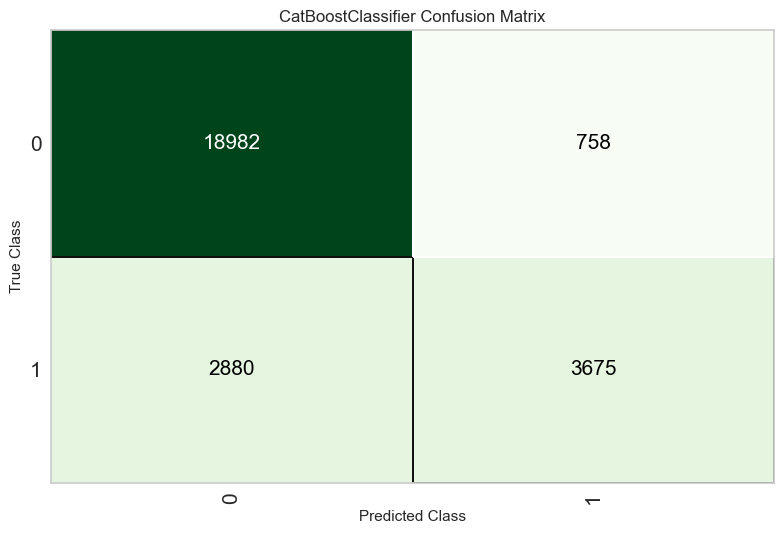

In [ ]:
plot_model(best, plot = 'confusion_matrix')

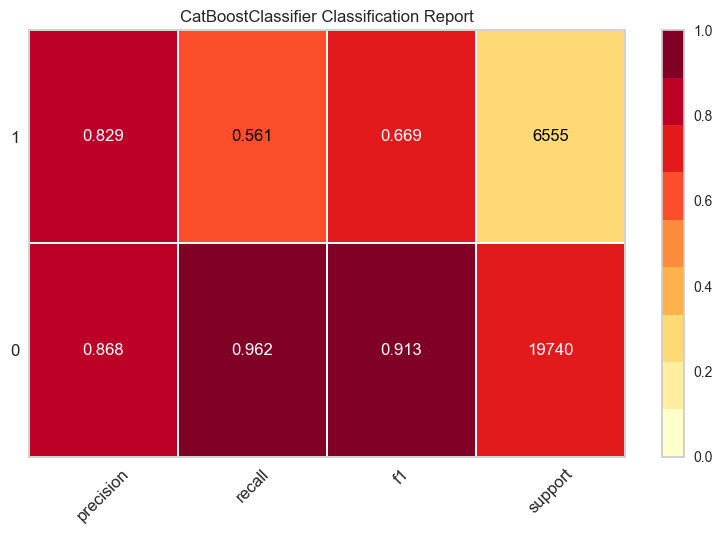

In [ ]:
plot_model(estimator=best, plot="class_report")

In [ ]:
# tune model
#tuned_dt = tune_model(best, choose_better = True)

#lr, optimize="recall", n_iter=80, early_stopping=True, choose_better=True
#n_iter = 5
#optimize = 'MAE'

In [ ]:
#plot_model(tuned_dt, plot = 'confusion_matrix')

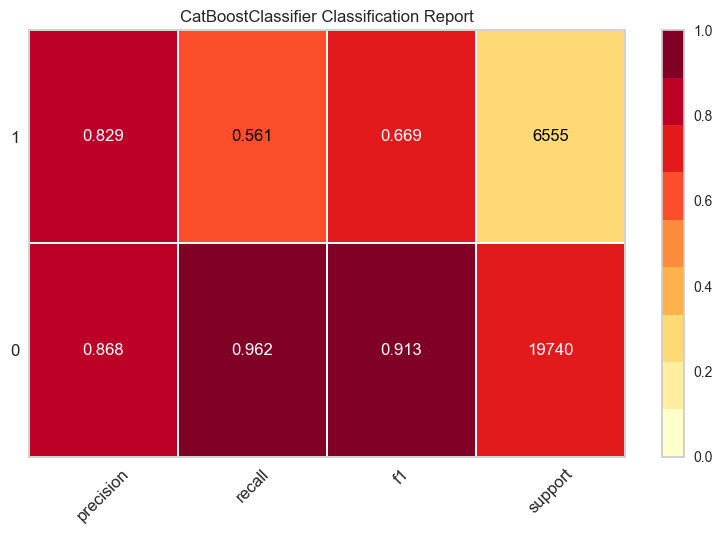

In [ ]:
plot_model(estimator=best, plot="class_report")

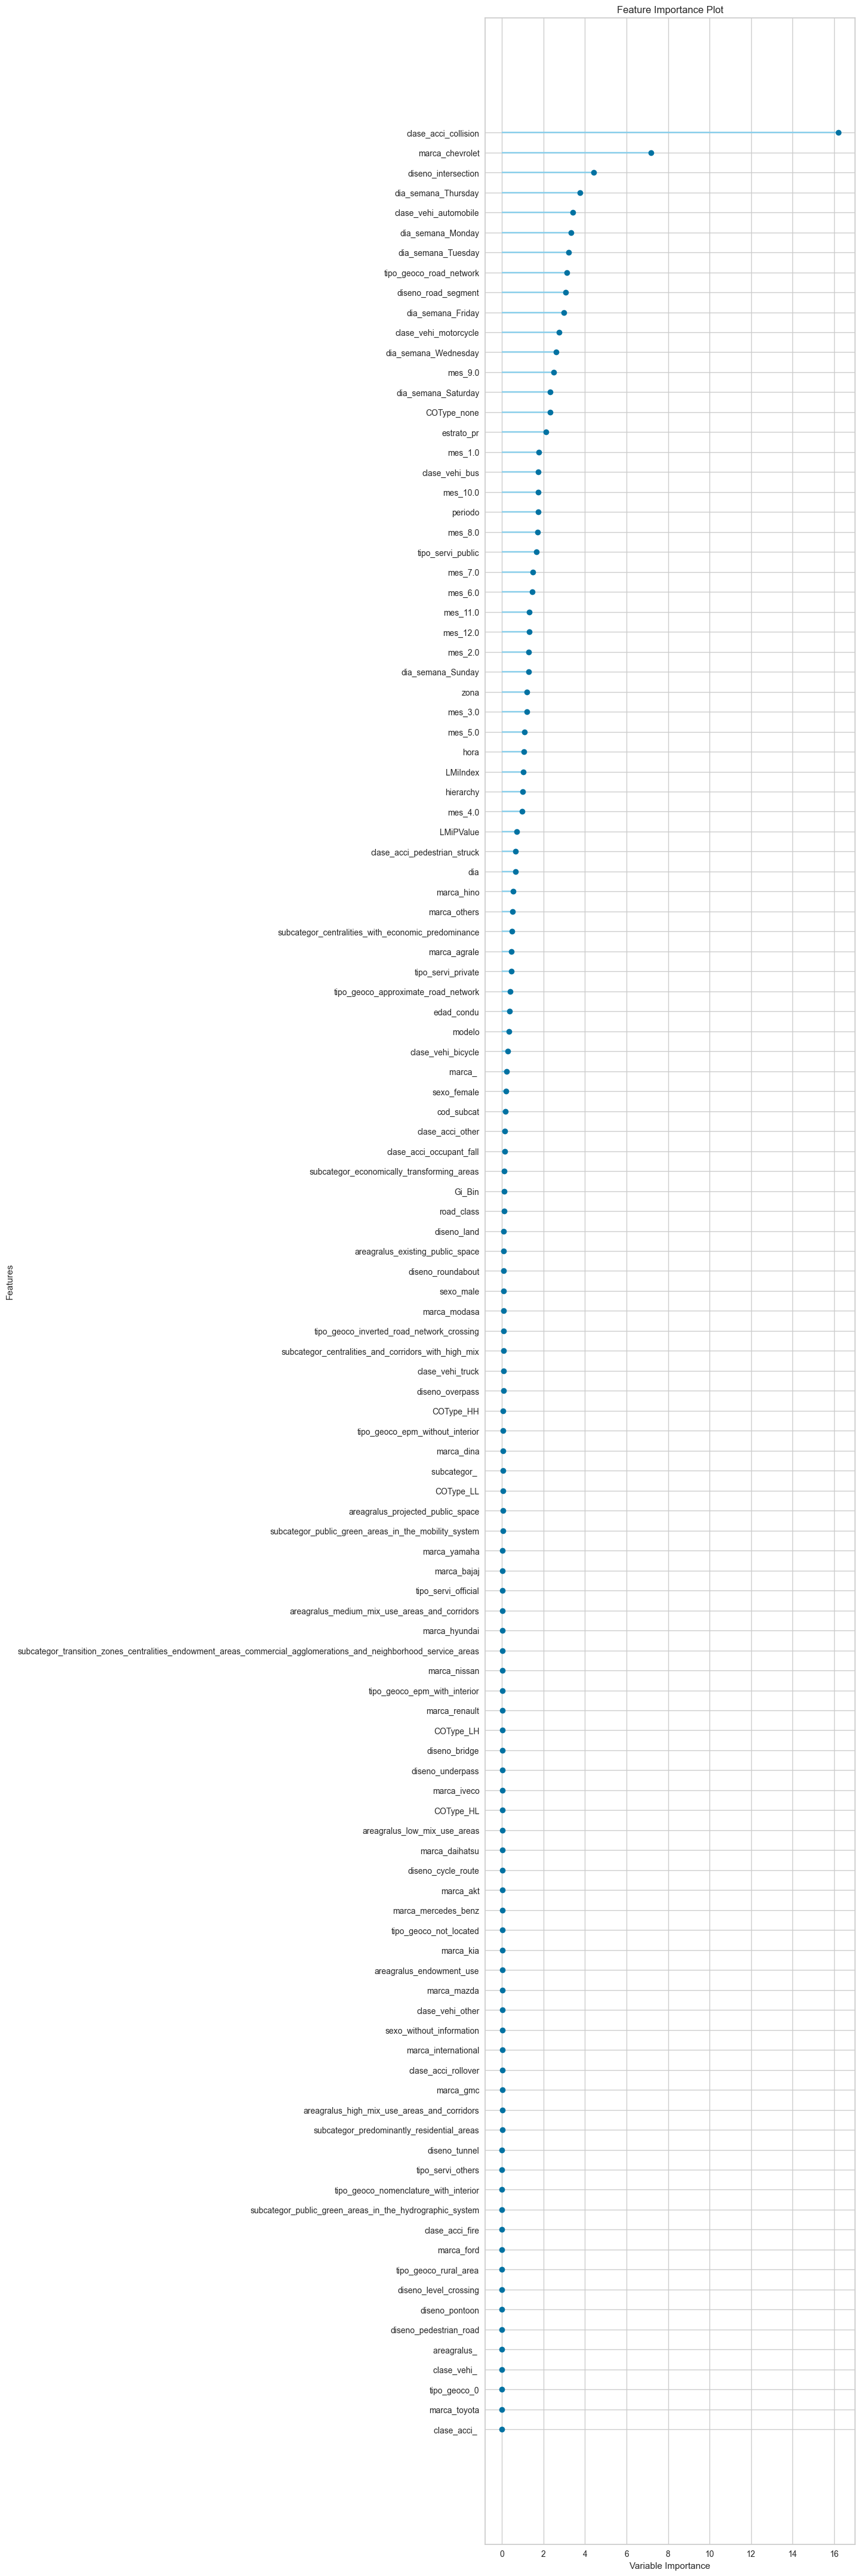

In [ ]:
# Visualize feature importance
plot_model(best, plot='feature_all')